## Introduction

Hi

Thanks to all who upvoted for the gold medal! I really appriciate it.
_____________________
This is my first attempt at DL/ML of something other than images. Therefore, I wanted to start with well explored dataset that has a lot of good kernels, relatively small amount of data and this competiotion seems to suit it. This kernel is mostly a blend of top/highly voted kernels, my attemp at learning from them and hopefully implementing them in future competitions. This work is still in progress and I will use it as learning platform to DL/ML techniques

<br> Upvotes, notes and remarks are very appriciated!
<brr>
Special thanks to this kernel: 
    <br> https://www.kaggle.com/alfredmaboa/advanced-regression-techniques-regularization/data

      
Also learneda lot and used those kernels: 
<br>
Source1 : https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
<br>
Source2 : https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners
<br> 
Source3 : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
<br>
Model source1 : https://www.kaggle.com/niteshx2/top-50-beginners-stacking-lgb-xgb


### Table of interest:
> ### 1. Importing libraries
> ### 2. Importing and inquiring data
> > #### 2.1 Importing data
> > #### 2.2 Quiring data
> ### 3. The predicted variable - Sales price Skew & kurtosis analysis
> > #### 3.1 Observing histogram
> > #### 3.2 Tansforming log or box cox: 
> ### 4. Missing data
> > #### 4.1 Presenting and locating missing data
> > #### 4.2 Replacing the missing data
> > Examples: Replacing NaN with "No", "0" most common value and such
> ### 5. Numerical and Categorial features
> > #### 5.1 Splitting the data into categorial and numerical features
> > #### 5.2 Box cox transform for skewd numerical data
>  ### 6. Adding Features
> > #### 6.1 Creating features from the data
> > Adding features at this section to be able to view them at the visualization section next 
> > #### 6.2 Deleting features
> > Features that cant be skewd or unsignificant.
> ### 7.Plotting the data
> > #### 7.1 Visually comparing data to sale prices
> > Boxplot for categorial features and 2D plot for numerical
> > #### 7.2 Comparing data to sale price through correlation matrix
> > #### 7.3 Pairplot for the most intresting parameters
> ### 8. Preparing the data 
> ### 9. Creating the model
> > #### 9.1 Importing learning libraries
> > #### 9.2 Defining folds and score functions
> > #### 9.3 Defining models
> > #### 9.4 Training the models
> > #### 9.5 Validating each model
> > #### 9.6 Blend model prediction
> ### 10 Submission


## 1. Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
#print(os.listdir("../input"))

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%matplotlib inline

## 2. Import And quiring data

### 2.1 Importing data
Importing, dropping ID and some outliers based on future EDA

In [6]:
# Read files
train = pd.read_csv('Data2/train.csv')
test = pd.read_csv('Data2/test.csv')

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# From EDA obvious outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])


print (train.columns)
print(test.columns)
print(train.shape,test.shape)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 2.2 Quiring the data
Just watching what's out there

In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1744.000,1443.000,1744.000,1744.000,1744.000,1744.000,1744.000,1728.000,1743.000,1743.000,...,1744.000,1744.000,1744.000,1744.000,1744.000,1744.000,1744.000,1744.000,1744.000,1744.000
mean,57.440,69.235,10300.602,6.082,5.556,1971.170,1983.967,100.653,435.814,45.461,...,93.144,47.550,24.245,2.542,14.844,1.312,50.264,6.204,2007.783,179277.212
std,42.697,23.350,8547.687,1.407,1.138,30.269,20.851,175.384,436.773,160.253,...,127.442,67.725,63.399,24.559,54.147,25.562,551.652,2.710,1.332,78829.736
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,58.000,7494.000,5.000,5.000,1954.000,1965.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000,129000.000
50%,50.000,68.000,9533.500,6.000,5.000,1973.000,1992.000,0.000,368.000,0.000,...,0.000,26.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,159467.000
75%,70.000,80.000,11700.000,7.000,6.000,2000.000,2003.000,165.250,726.500,0.000,...,168.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,212000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,2288.000,1393.000,...,1424.000,742.000,584.000,407.000,576.000,576.000,15500.000,12.000,2010.000,755000.000


In [8]:
train.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,nan,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000
1,20,RL,nan,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000
2,20,RL,88.000,12803,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000
3,60,FV,114.000,8314,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.600
4,20,RL,78.000,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000
5,90,RL,55.000,12640,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,150900.000
6,20,RL,85.000,11049,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900.000


## 3. The predicted variable - Sales price Skew & kurtosis analysis
The predicted variable is probably the most important variable, therefore it should be inspected throughly. 
<br> It turns out models work better with symmetric gaussian distributions, therefore we want to get rid of the skewness by using log transformation. More on log transformation later
<br> <br> Skew: 
\begin{equation} 
skew \left( X  \right) = E[ \frac{X-\mu}{\sigma} ]^3
\end{equation} https://en.wikipedia.org/wiki/Skewness
![](https://www.managedfuturesinvesting.com/images/default-source/default-album/measure-of-skewness.jpg?sfvrsn=0)
 
<br> Kurtosis: $$kurtosis(X) = E[ (\frac{X-\mu}{\sigma})^4  ]$$
https://en.wikipedia.org/wiki/Kurtosis
![](https://siemensplm.i.lithium.com/t5/image/serverpage/image-id/38460iB0F0D63C4F9B568A/image-size/large?v=1.0&px=999)

### 3.1 Observing Sale price histogram


Skewness: 1.793620
Kurtosis: 5.652844


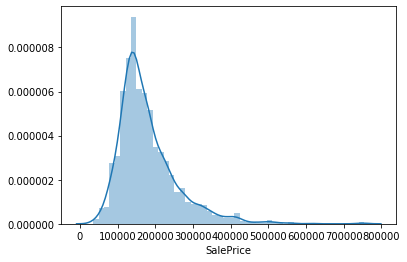

In [9]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

### 3.2 Tansforming: \begin{equation*} Y = log(1 + X)) \end{equation*}
Should correct for skew.
<br> A random example of a different log transformation
![](http://www.biostathandbook.com/pix/transformfig1.gif)


 mu = 179277.21 and sigma = 78807.13


 mu = 12.01 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

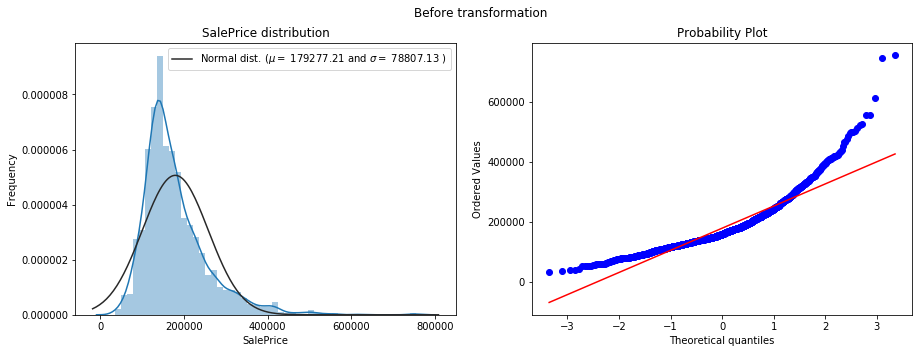

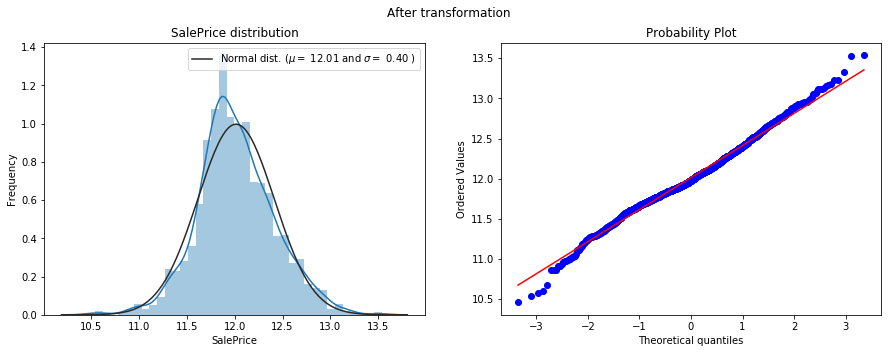

In [10]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
train.SalePrice = np.log1p(train.SalePrice )
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

Concatenate train and test

In [11]:
# y_train_orig = train.SalePrice
# train.drop("SalePrice", axis = 1, inplace = True)
data_features = pd.concat((train, test)).reset_index(drop=True)
print(data_features.shape)

# print(train.SalePrice)

(2912, 80)


## 4. Missing data

### 4.1 Locating missing data


In [12]:
# Missing data in train
data_features_na = data_features.isnull().sum()
data_features_na = data_features_na[data_features_na>0]
data_features_na.sort_values(ascending=False)

PoolQC          2903
MiscFeature     2807
Alley           2714
Fence           2341
FireplaceQu     1418
SalePrice       1168
LotFrontage      486
GarageYrBlt      158
GarageFinish     158
GarageQual       158
GarageCond       158
GarageType       156
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [13]:
#missing data percent plot
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2903,0.997
MiscFeature,2807,0.964
Alley,2714,0.932
Fence,2341,0.804
FireplaceQu,1418,0.487
SalePrice,1168,0.401
LotFrontage,486,0.167
GarageCond,158,0.054
GarageYrBlt,158,0.054
GarageQual,158,0.054


### 4.2 Replacing the missing data

Correcting for the format, mostly filling NaN with "No" or "0"

#### String Values
For numbers that have no significance and should actually be strings

In [14]:
str_vars = ['MSSubClass','YrSold','MoSold']
for var in str_vars:
    data_features[var] = data_features[var].apply(str)


Most common (frequent) string transform

In [15]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for var in common_vars:
    data_features[var] = data_features[var].fillna(data_features[var].mode()[0])
    
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data_features['MSZoning'] = data_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Turn Nan to None 

In [16]:
# # data description says NA means "No Pool", majority of houses have no Pool at all in general.
# features[] = features["PoolQC"].fillna("None")
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data_features[col] = data_features[col].fillna('None')
# # For all these categorical basement-related features, NaN means that there is no basement
# for col in (:
#     features[col] = features[col].fillna('None')

Fill numerical data - 0 or median

In [17]:
# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    data_features[col] = data_features[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_features['LotFrontage'] = data_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', data_features.shape)

Features size: (2912, 80)


Uniqe

In [18]:
# data description says NA means typical
data_features['Functional'] = data_features['Functional'].fillna('Typ')


In [19]:
#missing data
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)



,Total,Percent
SalePrice,1168,0.401
SaleCondition,0,0.000
RoofMatl,0,0.000
Exterior1st,0,0.000
Exterior2nd,0,0.000
MasVnrType,0,0.000
MasVnrArea,0,0.000
ExterQual,0,0.000
ExterCond,0,0.000
Foundation,0,0.000


## 5. Numerical and Categorial features

### 5.1 Splitting the data into categorial and numerical features

In [20]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = data_features.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = data_features.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
feat_num = data_features[numerical_features]
feat_cat = data_features[categorical_features]

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'B

In [21]:
feat_num.head(10)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,70.000,21695,6,9,1988,2007,260.000,808.000,0.000,72.000,...,2.000,540.000,292,44,0,182,0,0,0,12.310
1,73.000,10530,6,5,1971,1971,0.000,282.000,35.000,664.000,...,2.000,576.000,0,312,40,0,0,0,0,11.872
2,88.000,12803,7,5,2002,2002,99.000,922.000,0.000,572.000,...,2.000,530.000,192,36,0,0,0,0,0,12.306
3,114.000,8314,7,5,1997,1998,0.000,0.000,0.000,569.000,...,1.000,434.000,0,382,0,0,110,0,0,12.156
4,78.000,10335,5,6,1968,1993,0.000,570.000,0.000,891.000,...,2.000,440.000,0,96,180,0,0,0,0,12.101
5,55.000,12640,6,5,1976,1976,0.000,936.000,396.000,396.000,...,2.000,574.000,40,0,0,0,0,0,0,11.924
6,85.000,11049,8,5,2007,2007,0.000,0.000,0.000,1234.000,...,2.000,484.000,0,30,0,0,0,0,0,12.100
7,60.000,6600,5,5,1962,1962,0.000,110.000,442.000,312.000,...,1.000,294.000,58,0,0,0,0,0,0,11.576
8,65.000,6305,6,6,1975,1975,0.000,528.000,0.000,480.000,...,1.000,352.000,0,0,0,0,0,0,0,11.811
9,55.000,7700,5,7,1956,1956,0.000,271.000,0.000,30.000,...,2.000,684.000,0,0,0,0,0,0,0,11.714


In [22]:
feat_cat.head(10)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,None,None,None,12,2009,WD,Normal
1,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,TA,Y,None,None,None,3,2007,WD,Normal
2,20,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,60,FV,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,...,TA,TA,Y,None,GdPrv,None,11,2006,WD,Normal
4,20,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,...,TA,TA,Y,None,MnPrv,None,7,2006,WD,Normal
5,90,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,TA,TA,Y,None,None,None,7,2006,WD,Normal
6,20,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,...,TA,TA,Y,None,None,None,1,2008,WD,Normal
7,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,None,None,None,12,2007,WD,Normal
8,80,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,TA,TA,Y,None,None,None,6,2010,WD,Normal
9,80,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,None,GdWo,None,9,2006,WD,Normal


### 5.2 Box cox transform for skewd numerical data
Another transformation to reduce skew. 
<br> Equation:
![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2015/07/boxcox-formula-1.png)
<br> Transformation example:
![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif/boxcox.gif)

In [23]:
# Plot skew value for each numerical value
from scipy.stats import skew 
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal         21.921
PoolArea        17.673
LotArea         13.101
LowQualFinSF    12.074
3SsnPorch       11.362
KitchenAbvGr     4.296
BsmtFinSF2       4.147
EnclosedPorch    3.998
ScreenPorch      3.941
BsmtHalfBath     3.926
MasVnrArea       2.620
OpenPorchSF      2.528
WoodDeckSF       1.844
1stFlrSF         1.256
LotFrontage      1.102
GrLivArea        1.068
BsmtFinSF1       0.981
BsmtUnfSF        0.919
2ndFlrSF         0.862
TotRmsAbvGrd     0.749
Fireplaces       0.726
HalfBath         0.697
TotalBsmtSF      0.670
BsmtFullBath     0.624
OverallCond      0.567
BedroomAbvGr     0.327
GarageArea       0.218
OverallQual      0.188
FullBath         0.165
GarageCars      -0.218
YearRemodAdd    -0.451
YearBuilt       -0.598
GarageYrBlt     -3.915
SalePrice          nan
dtype: float64

Encode categorial features: can and should be replaced.

In [24]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    feat_num[feat] = boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    data_features[feat] = boxcox1p(data_features[feat], boxcox_normmax(data_features[feat] + 1))
    
    
from scipy.stats import skew 
skewness.sort_values(ascending=False)

There are 27 skewed numerical features to Box Cox transform
Mean skewnees: 4.042226849198996


MiscVal         21.921
PoolArea        17.673
LotArea         13.101
LowQualFinSF    12.074
3SsnPorch       11.362
KitchenAbvGr     4.296
BsmtFinSF2       4.147
EnclosedPorch    3.998
ScreenPorch      3.941
BsmtHalfBath     3.926
MasVnrArea       2.620
OpenPorchSF      2.528
WoodDeckSF       1.844
1stFlrSF         1.256
LotFrontage      1.102
GrLivArea        1.068
BsmtFinSF1       0.981
BsmtUnfSF        0.919
2ndFlrSF         0.862
TotRmsAbvGrd     0.749
Fireplaces       0.726
HalfBath         0.697
TotalBsmtSF      0.670
BsmtFullBath     0.624
OverallCond      0.567
YearBuilt       -0.598
GarageYrBlt     -3.915
dtype: float64

Observe the correction. 
We can see that a lot of parameters remained skewd. I suspect that's for variables that have a lot of 0. 

In [25]:
skewness = feat_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)


There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.497976307558751


PoolArea        15.582
3SsnPorch        8.854
LowQualFinSF     8.485
MiscVal          5.233
BsmtHalfBath     3.776
KitchenAbvGr     3.774
ScreenPorch      3.149
BsmtFinSF2       2.580
EnclosedPorch    2.147
MasVnrArea       0.977
2ndFlrSF         0.895
WoodDeckSF       0.785
HalfBath         0.733
GarageYrBlt      0.703
OpenPorchSF      0.621
BsmtFullBath     0.618
Fireplaces       0.554
dtype: float64

## 6. Adding features


### 6.1 Creating features from the data
Adding features at this section to be able to view them at the visualization section next 


In [26]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
data_features['TotalSF']=data_features['TotalBsmtSF'] + data_features['1stFlrSF'] + data_features['2ndFlrSF']
#  Adding total bathrooms feature
data_features['Total_Bathrooms'] = (data_features['FullBath'] + (0.5 * data_features['HalfBath']) +
                               data_features['BsmtFullBath'] + (0.5 * data_features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
data_features['Total_porch_sf'] = (data_features['OpenPorchSF'] + data_features['3SsnPorch'] +
                              data_features['EnclosedPorch'] + data_features['ScreenPorch'] +
                              data_features['WoodDeckSF'])


# data_features['Super_quality'] = OverallQual * 
# vars = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath']


### 6.2 Deleting features
Features that cant be skewd or are unsignificant.

In [27]:
data_features['haspool'] = data_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasgarage'] = data_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasbsmt'] = data_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasfireplace'] = data_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


# Not normaly distributed can not be normalised and has no central tendecy
data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)
# data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF',
#                          'PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath','ScreenPorch',
#                          'ScreenPorch','KitchenAbvGr','BsmtFinSF2','EnclosedPorch','LotFrontage'
#                          ,'BsmtUnfSF','GarageYrBlt'], axis=1)

print('data_features size:', data_features.shape)


data_features size: (2912, 82)


### 5.9 Splitting the data back to train and test


In [28]:
train = data_features.iloc[:len(y_train), :]
test = data_features.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1744, 82), 'Prediction on (Sales price) shape: ', (1744,), 'Test shape: ', (1168, 82)]


## 7.Plotting the data

### 7.1 Visually comparing data to sale prices
One can observe the behaviour of the variables, locate outlier and more.

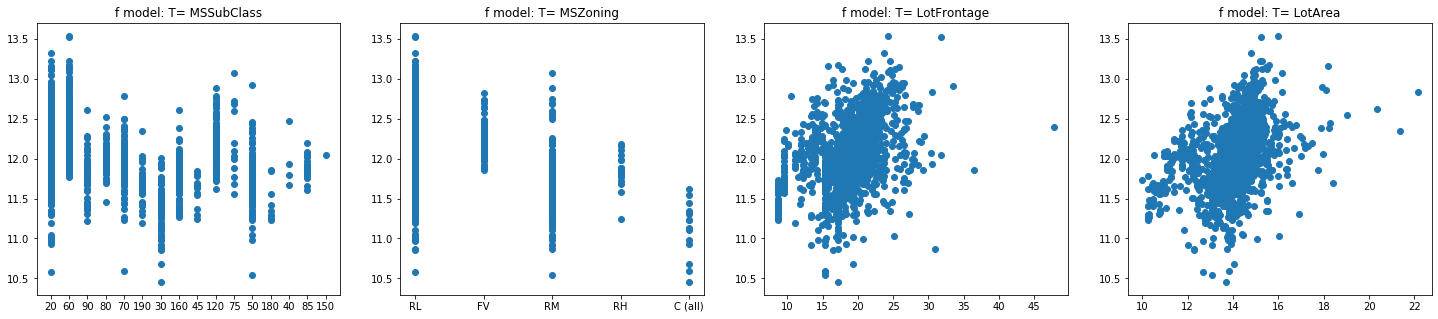

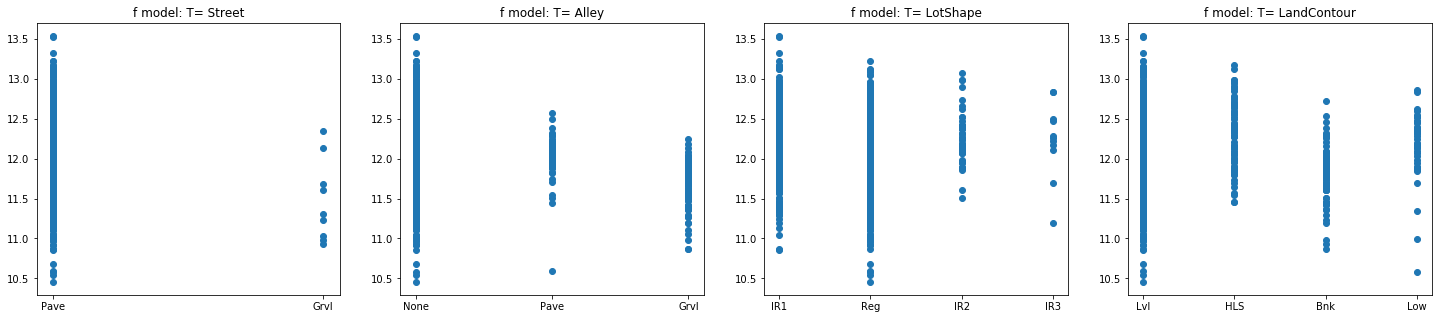

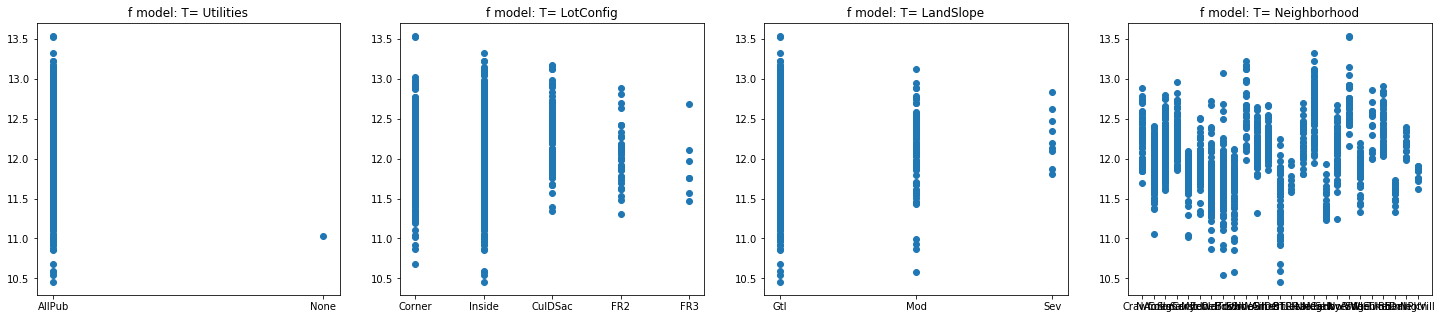

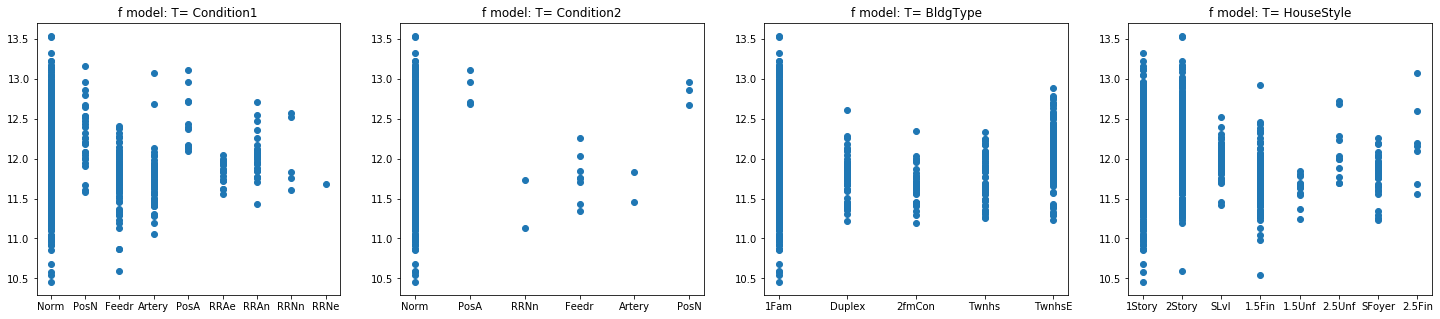

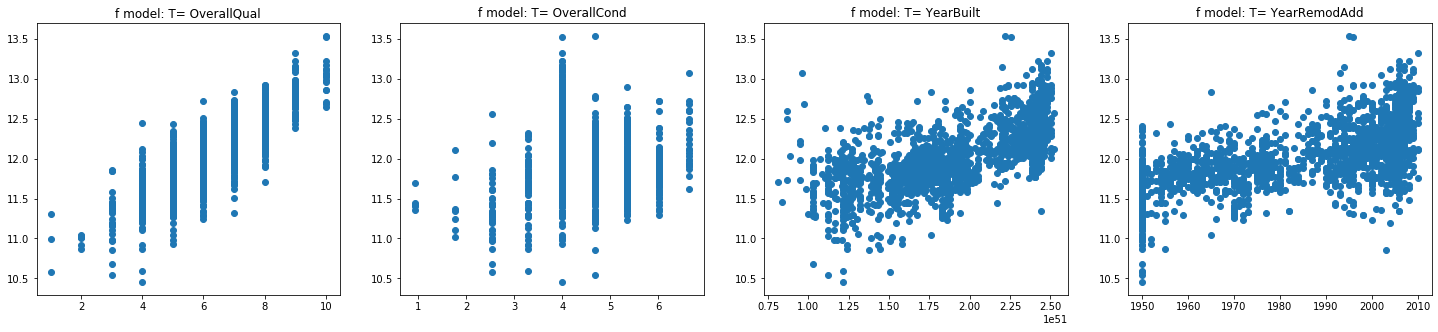

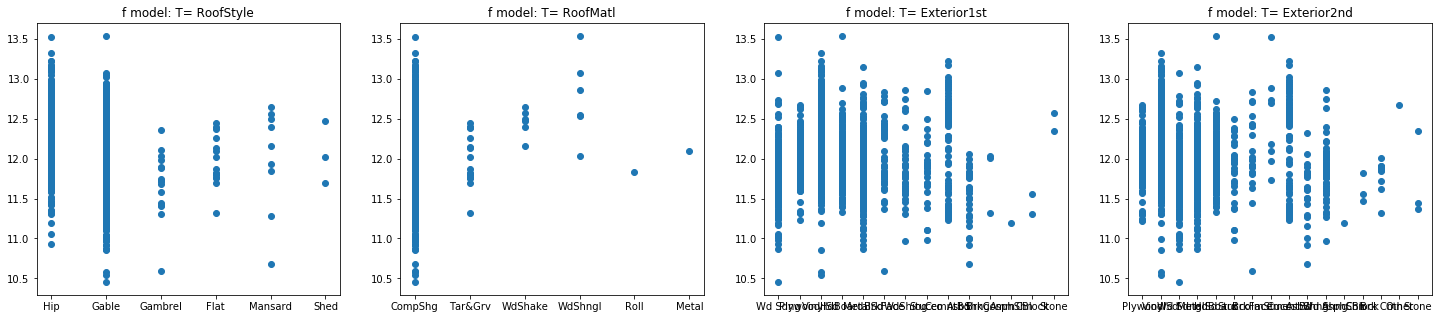

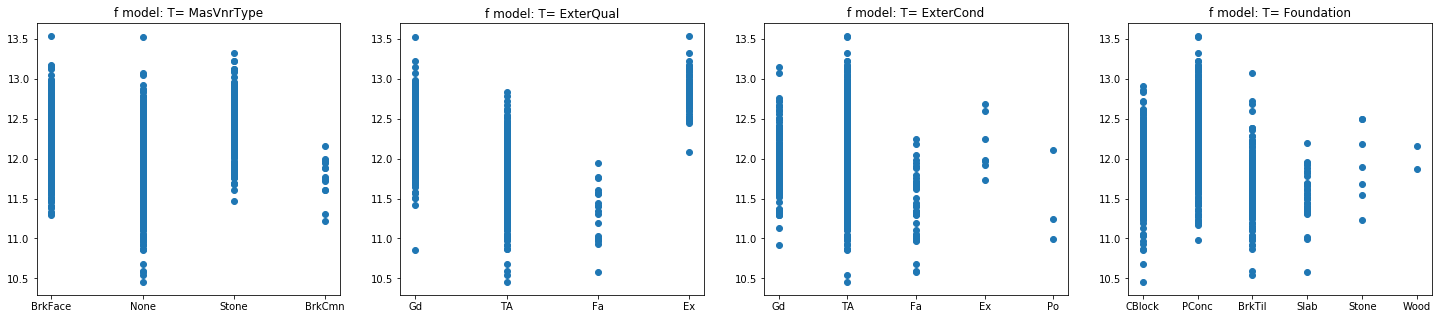

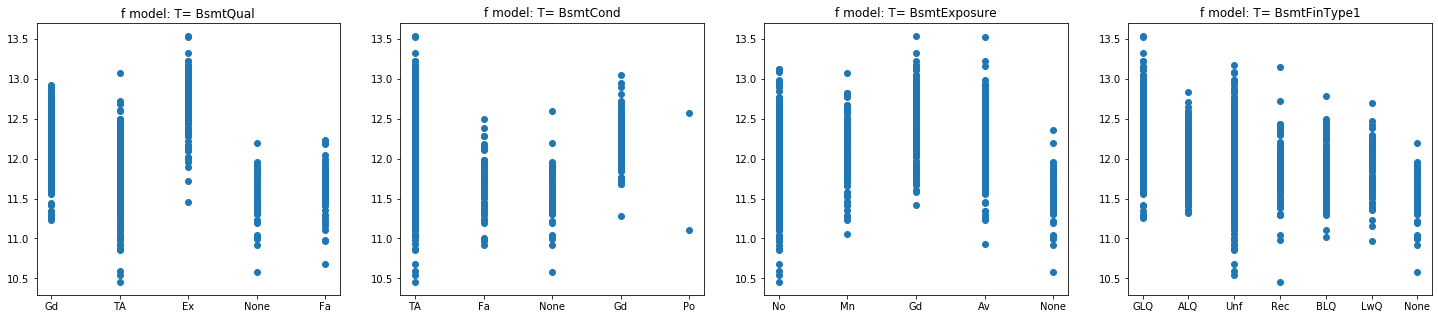

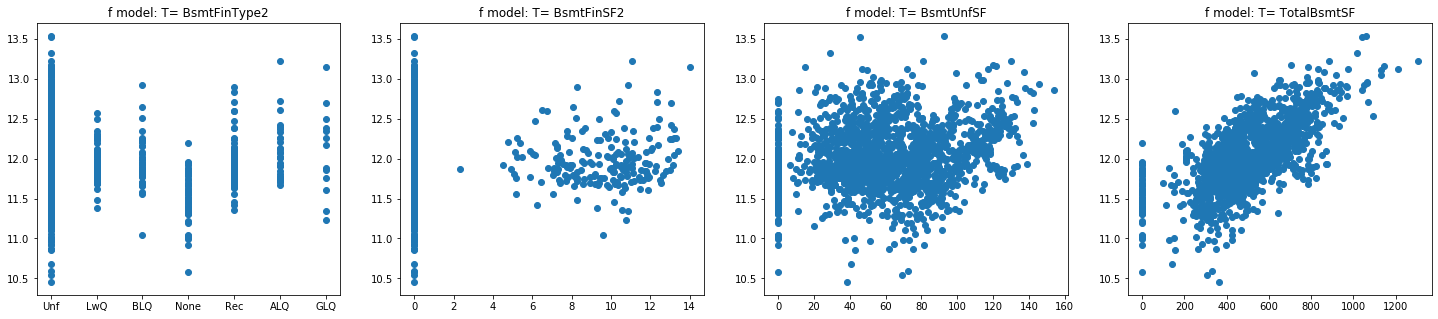

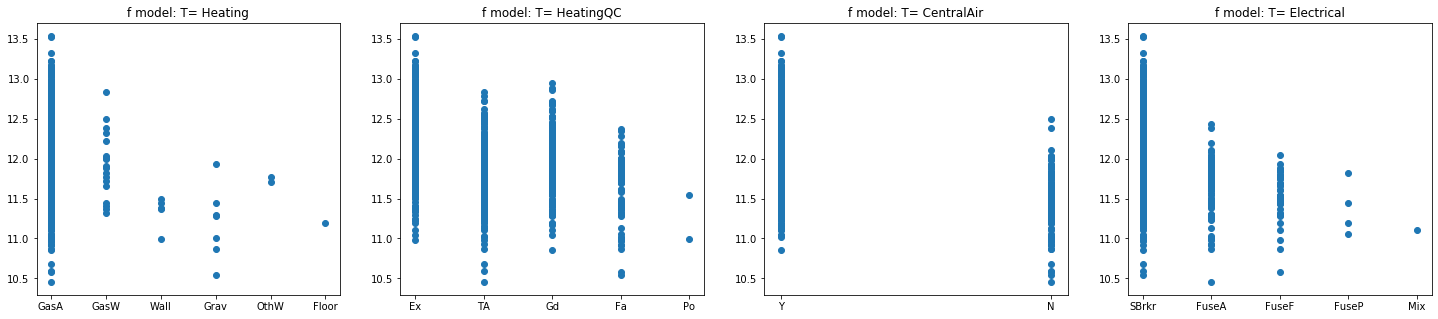

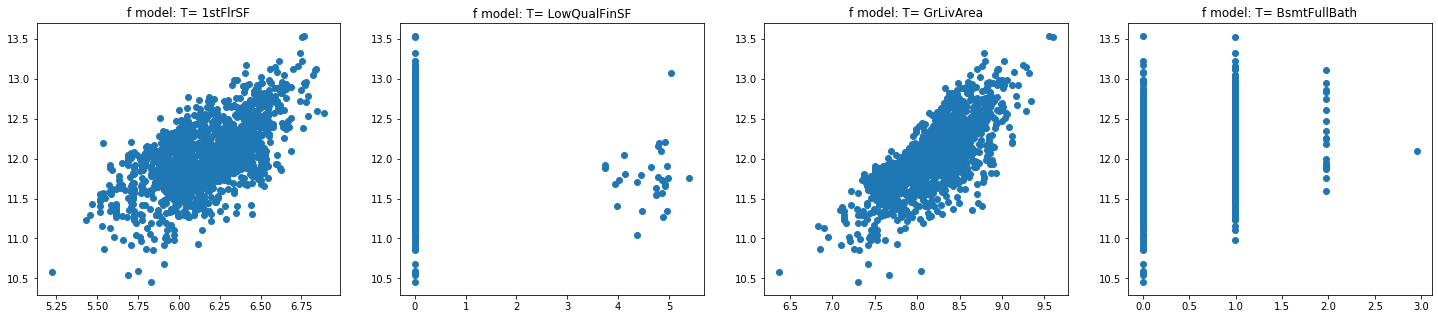

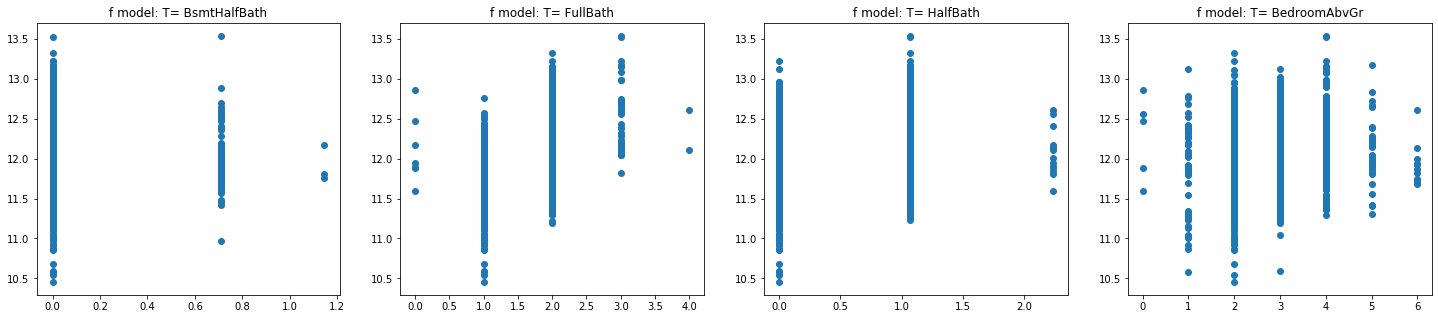

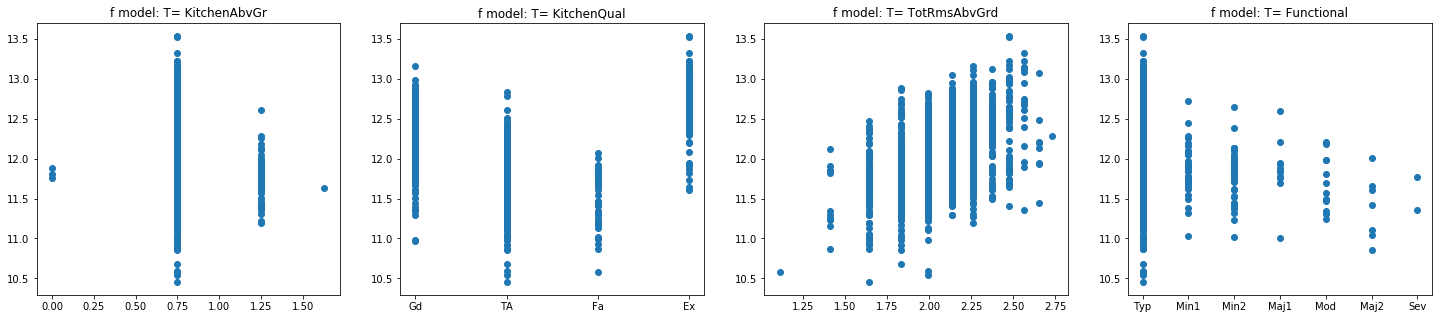

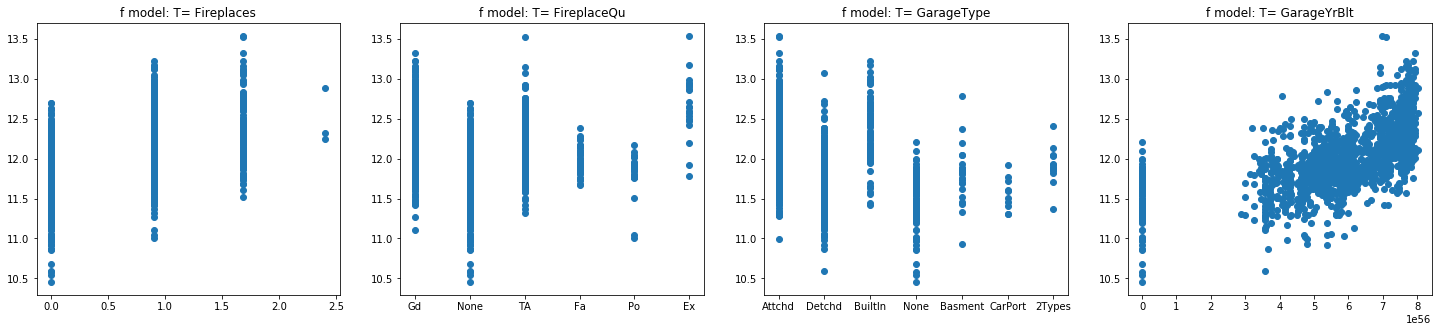

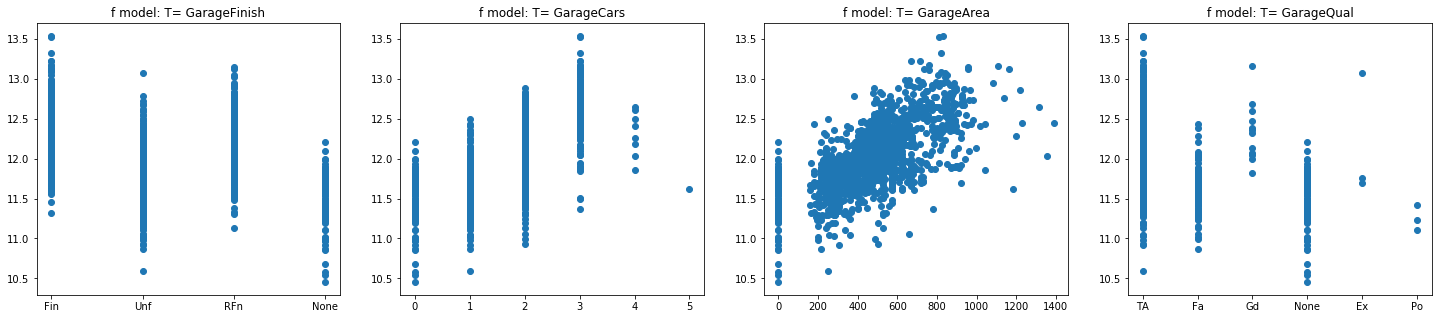

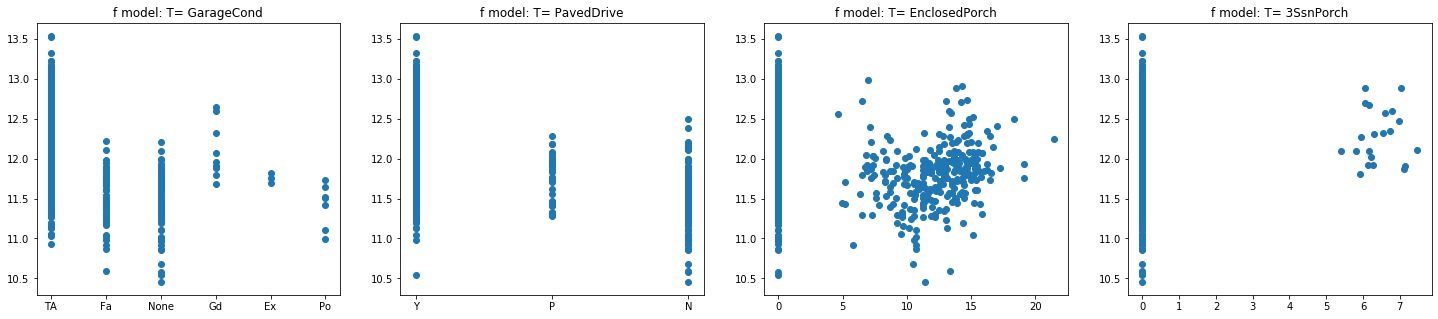

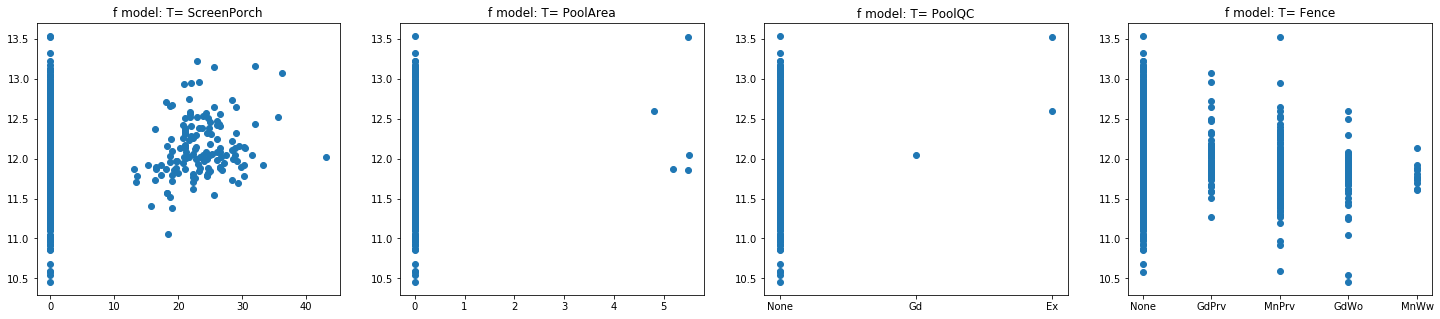

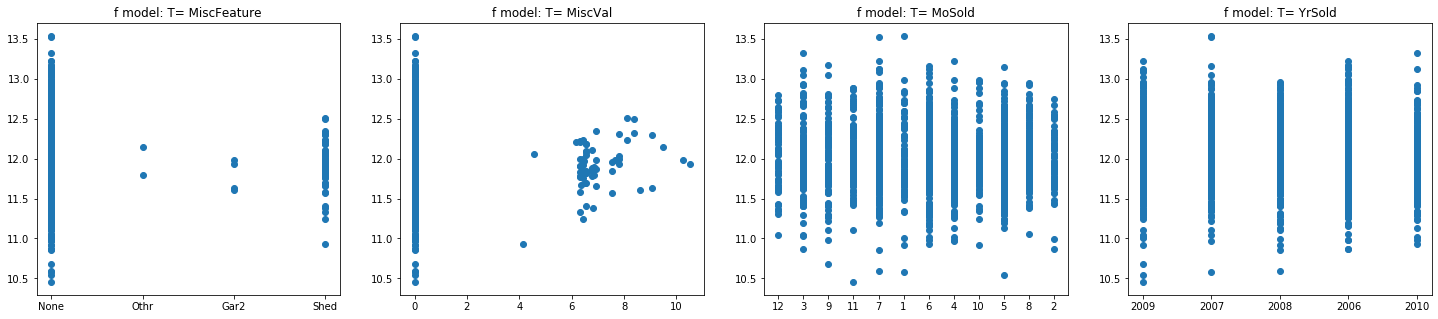

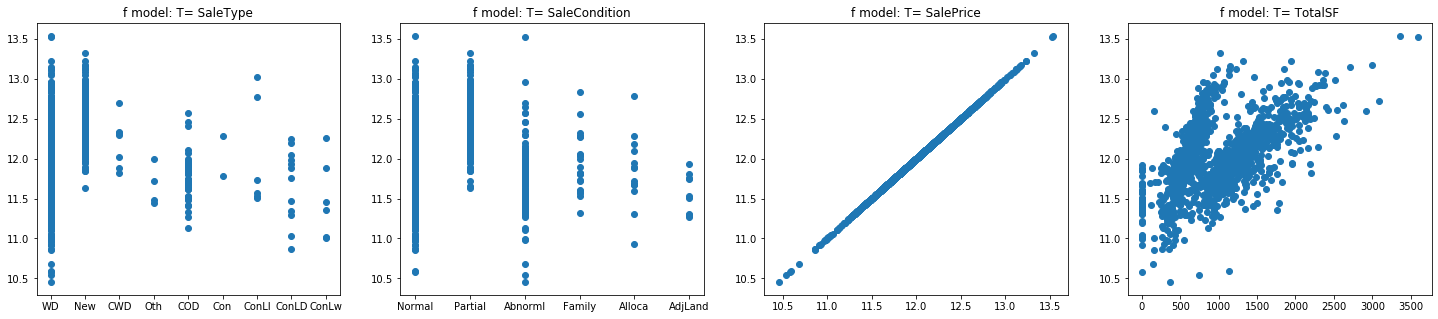

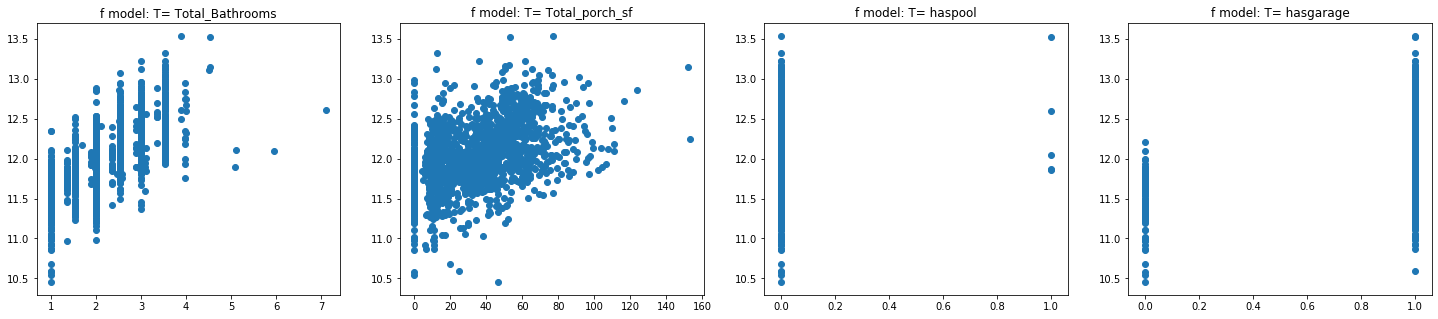

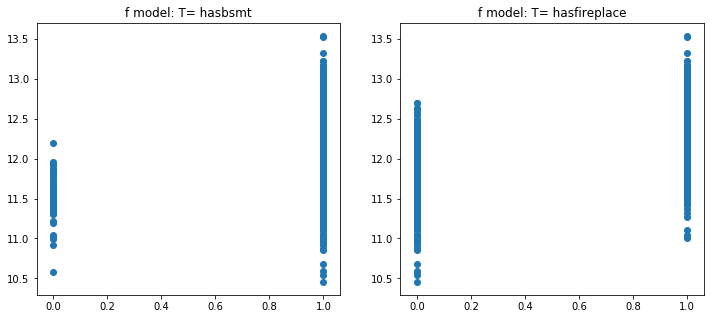

In [29]:
vars = data_features.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1
    


remove outliers

In [30]:
# Removes outliers 
# outliers = [30, 88, 462, 631, 1322]
# train = train.drop(train.index[outliers])
y_train = train['SalePrice']

### Optional: Box plot

Box plot is heavy, one can manualy choose the intresting parameters

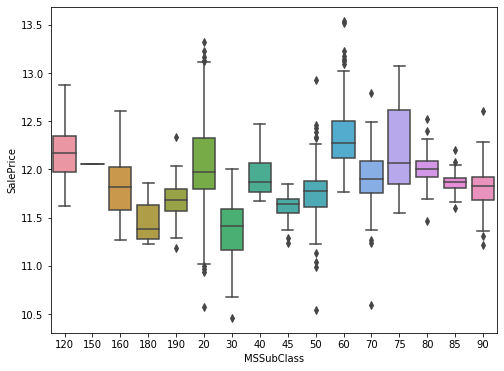

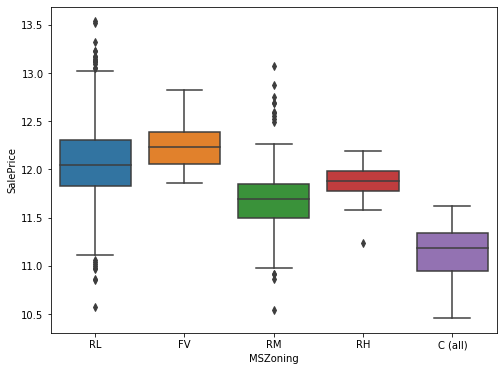

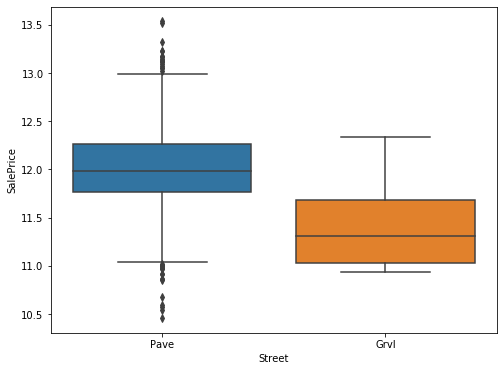

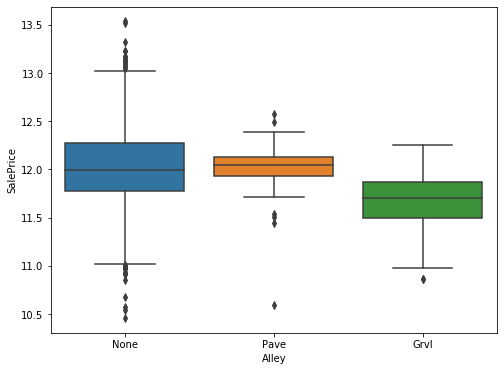

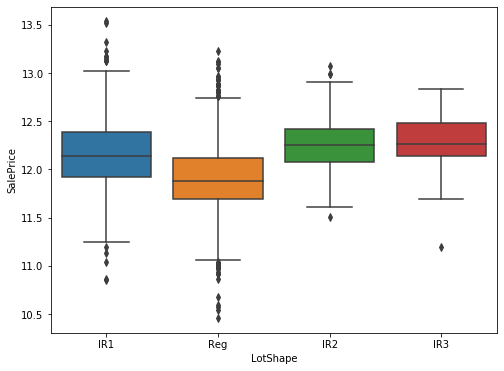

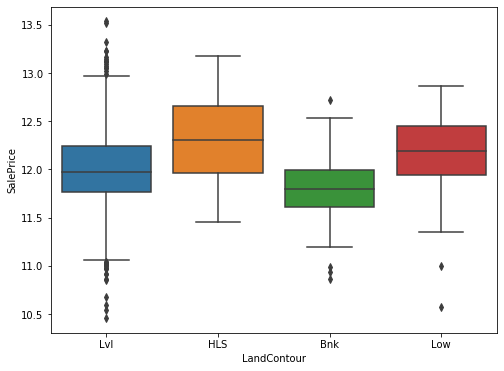

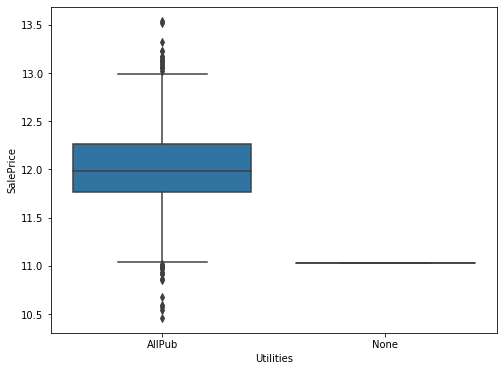

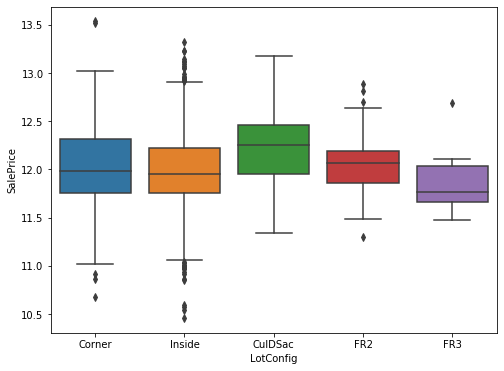

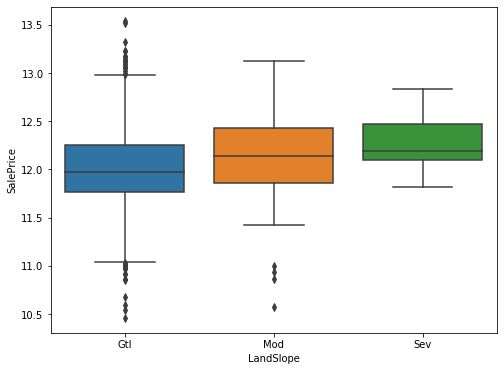

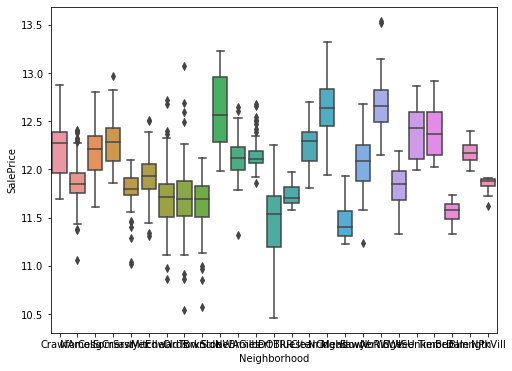

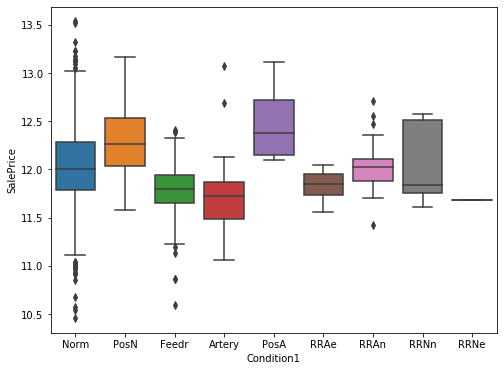

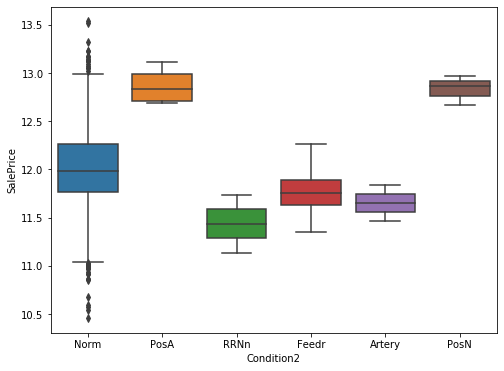

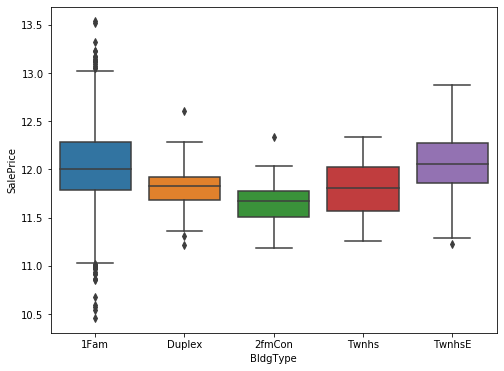

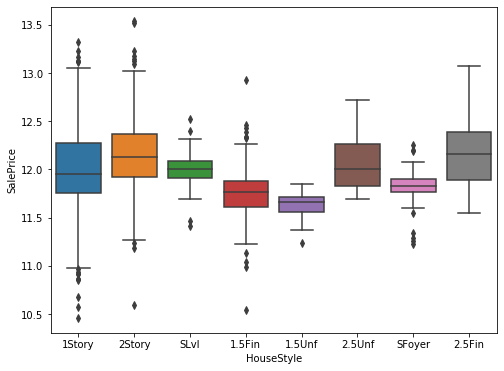

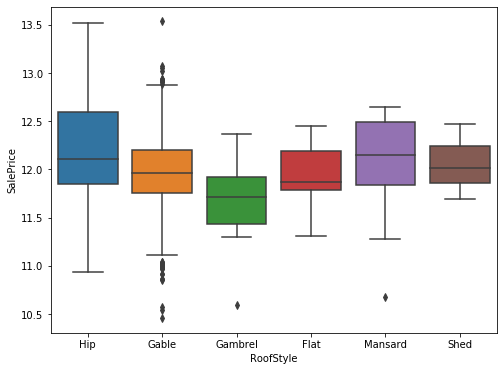

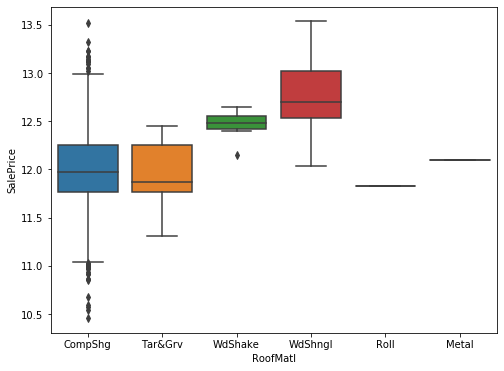

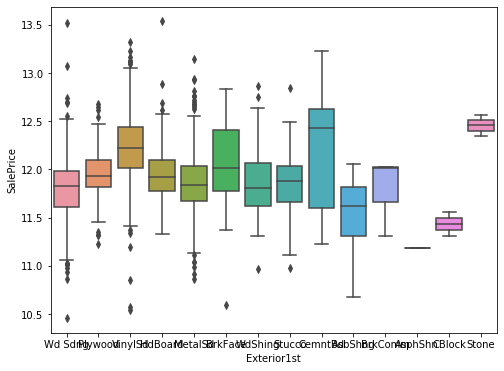

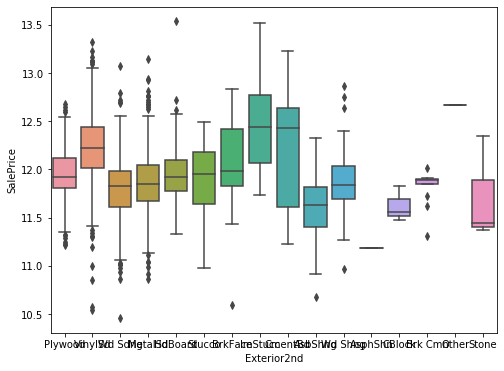

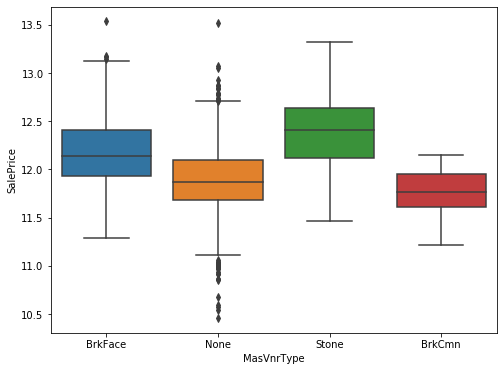

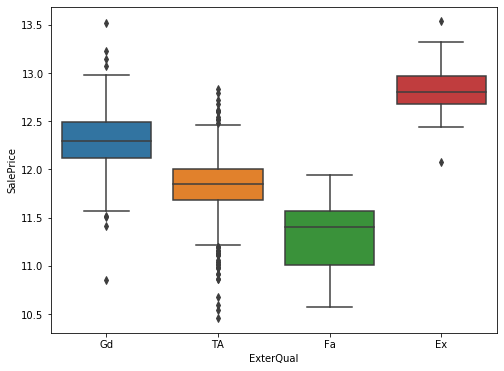

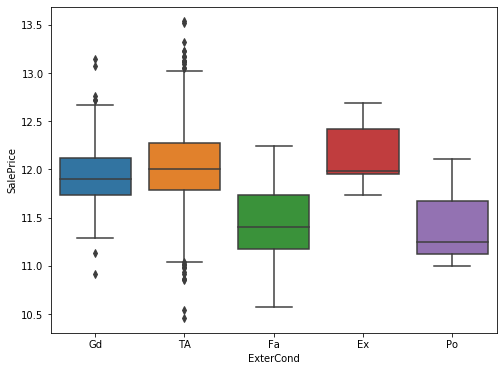

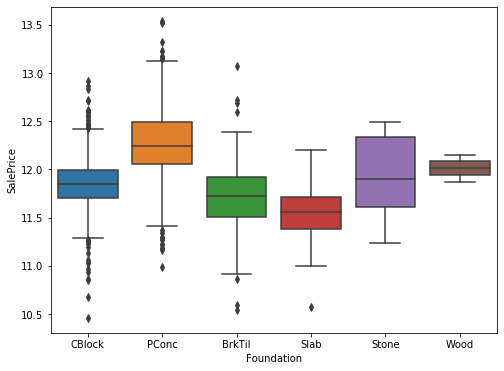

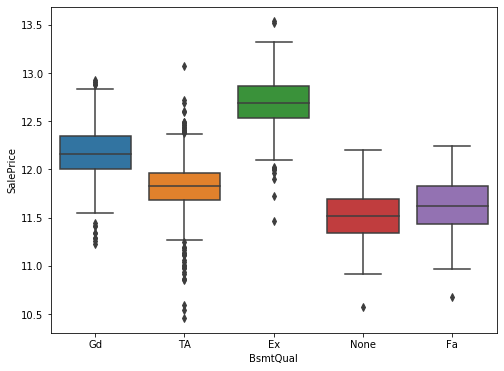

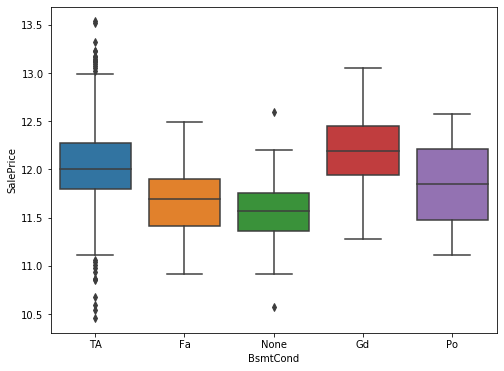

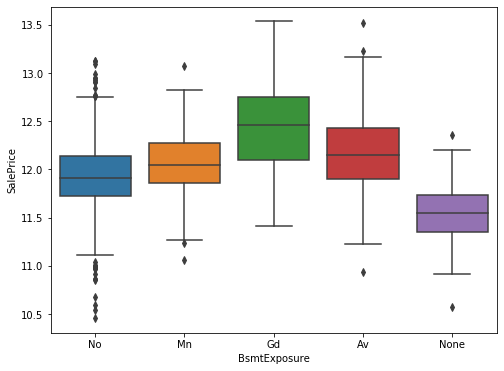

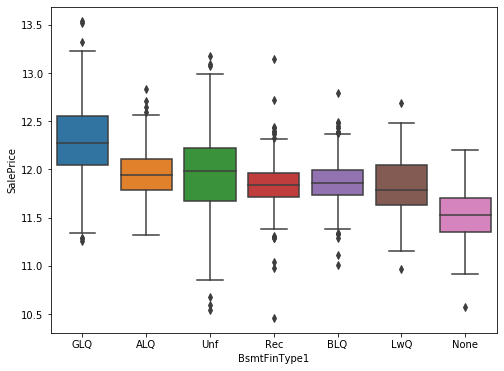

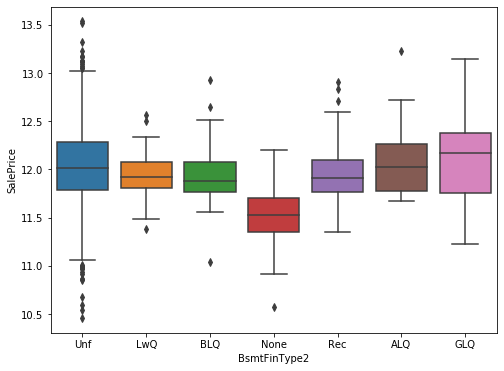

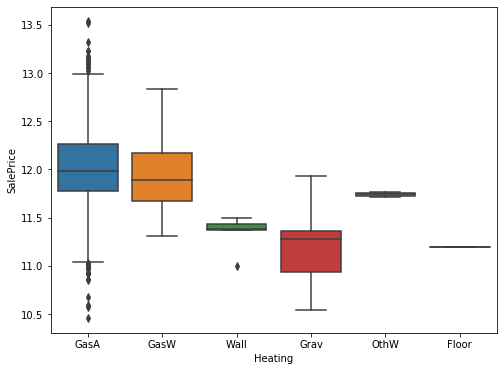

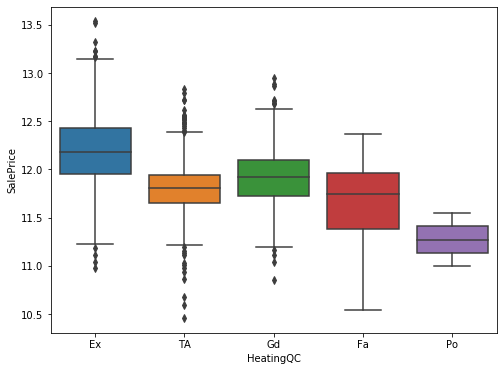

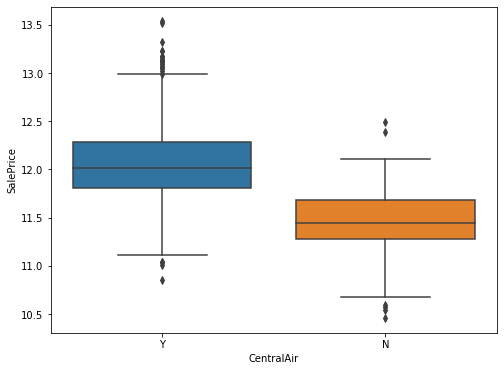

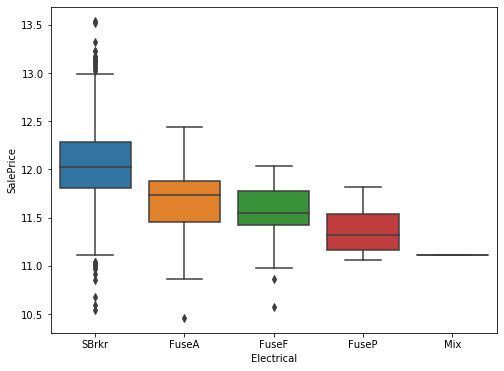

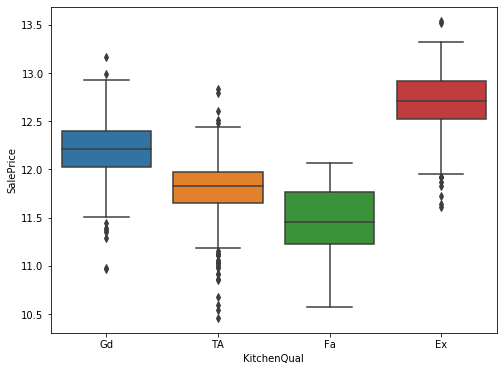

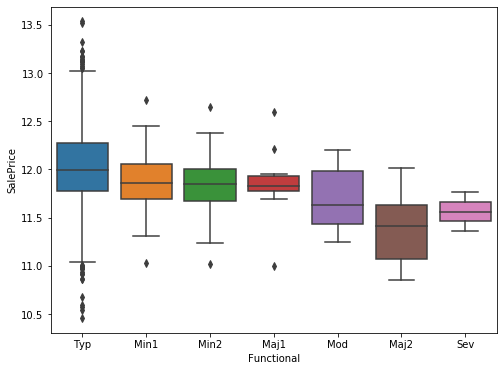

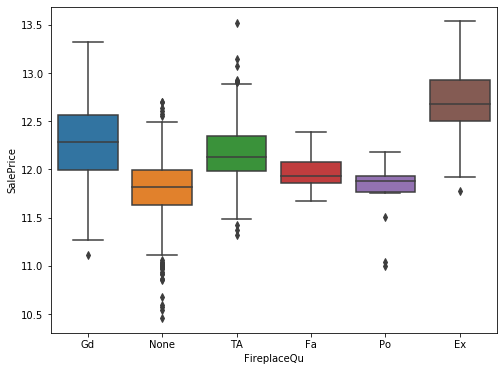

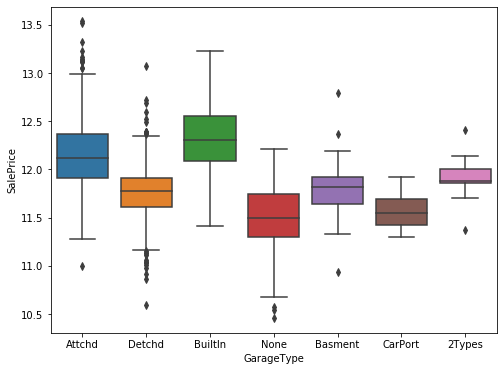

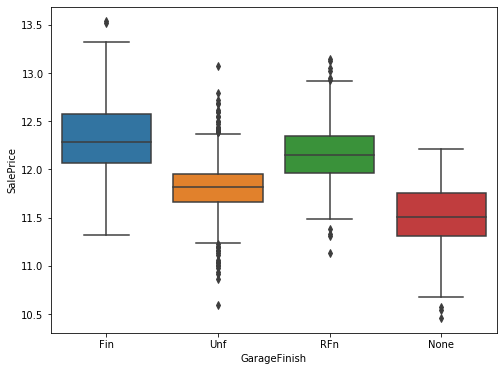

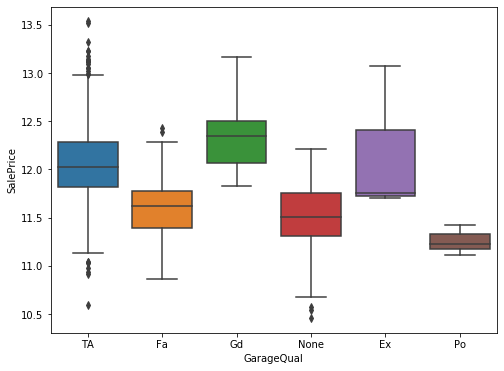

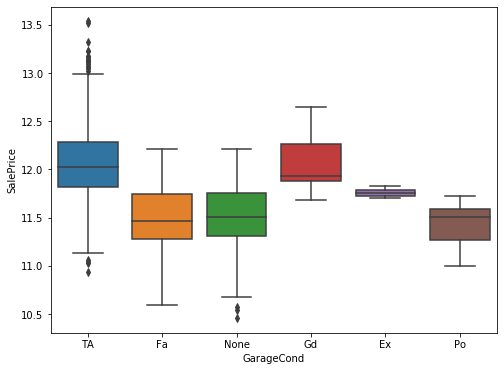

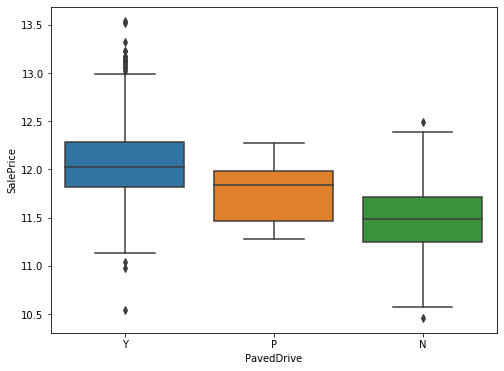

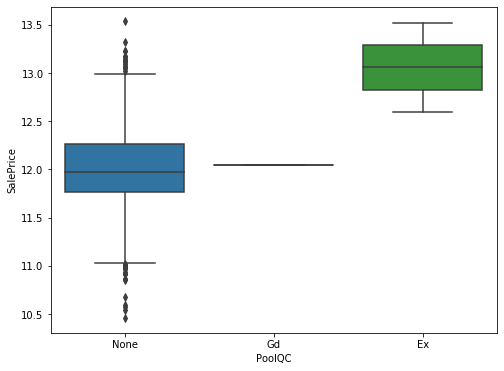

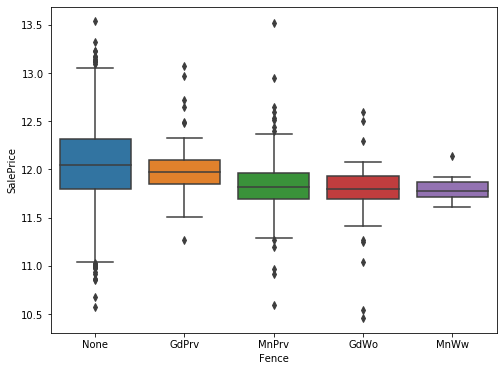

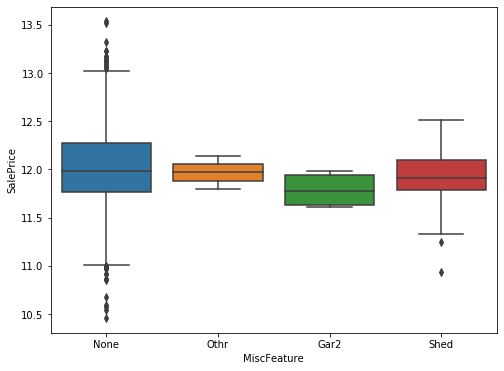

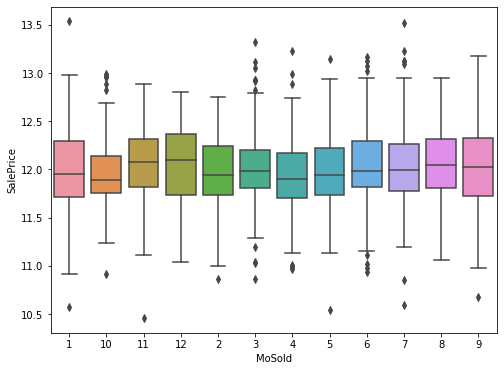

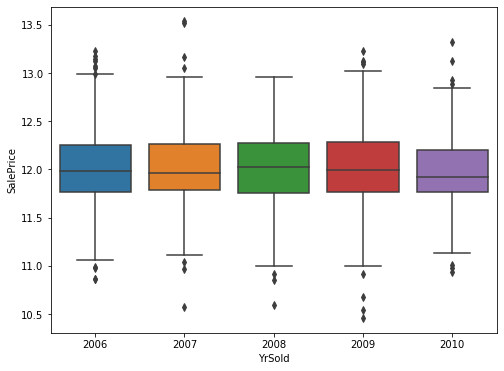

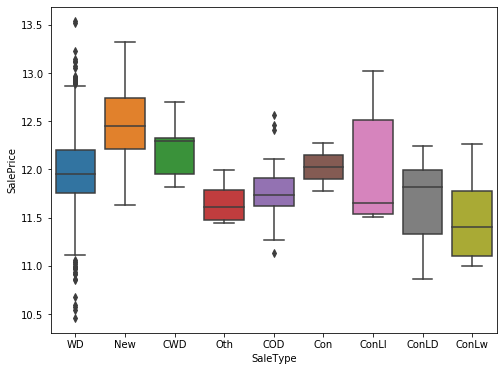

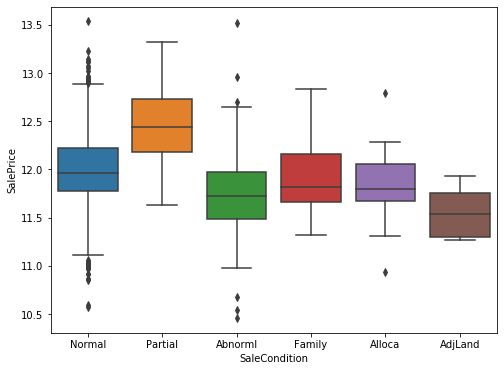

In [31]:

# vars_box = ['OverallQual','YearBuilt','BedroomAbvGr']
vars_box = feat_cat
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)

### 7.2 Comparing data to sale price through correlation matrix

Numerical values correlation matrix, to locate dependencies between different variables. 

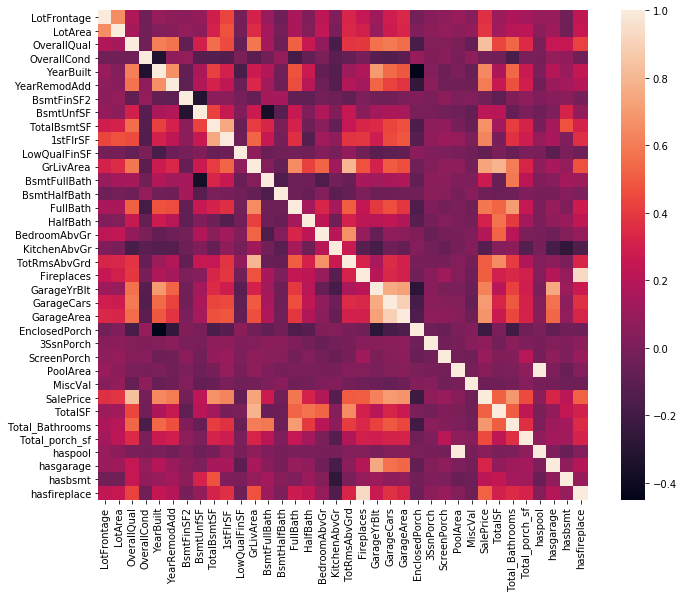

In [32]:
# Complete numerical correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

#### Largest correlation with Sale Price
Its important to remmber that this are 2D correlations, between sale price and another variable. When stacking all of the parameters the dependencies the picture gets more complex.

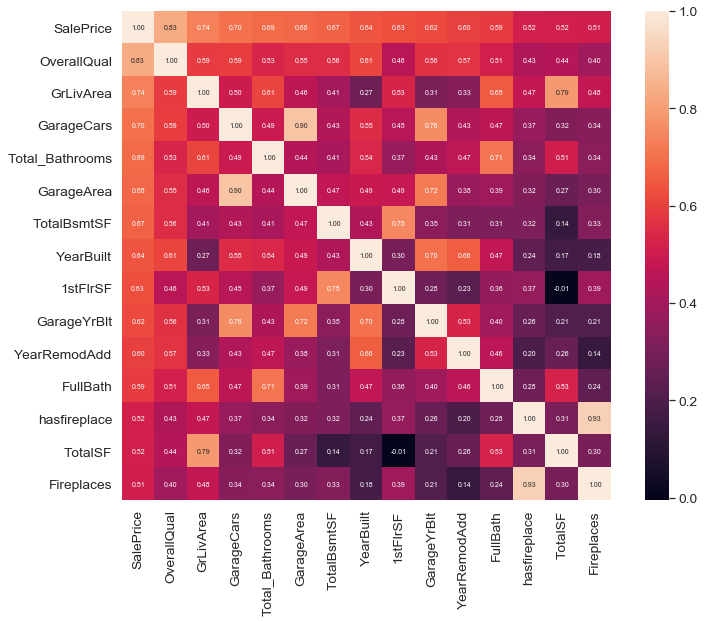

In [33]:
# saleprice correlation matrix
corr_num = 15 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

### 7.3 Pairplot for the most intresting parameters

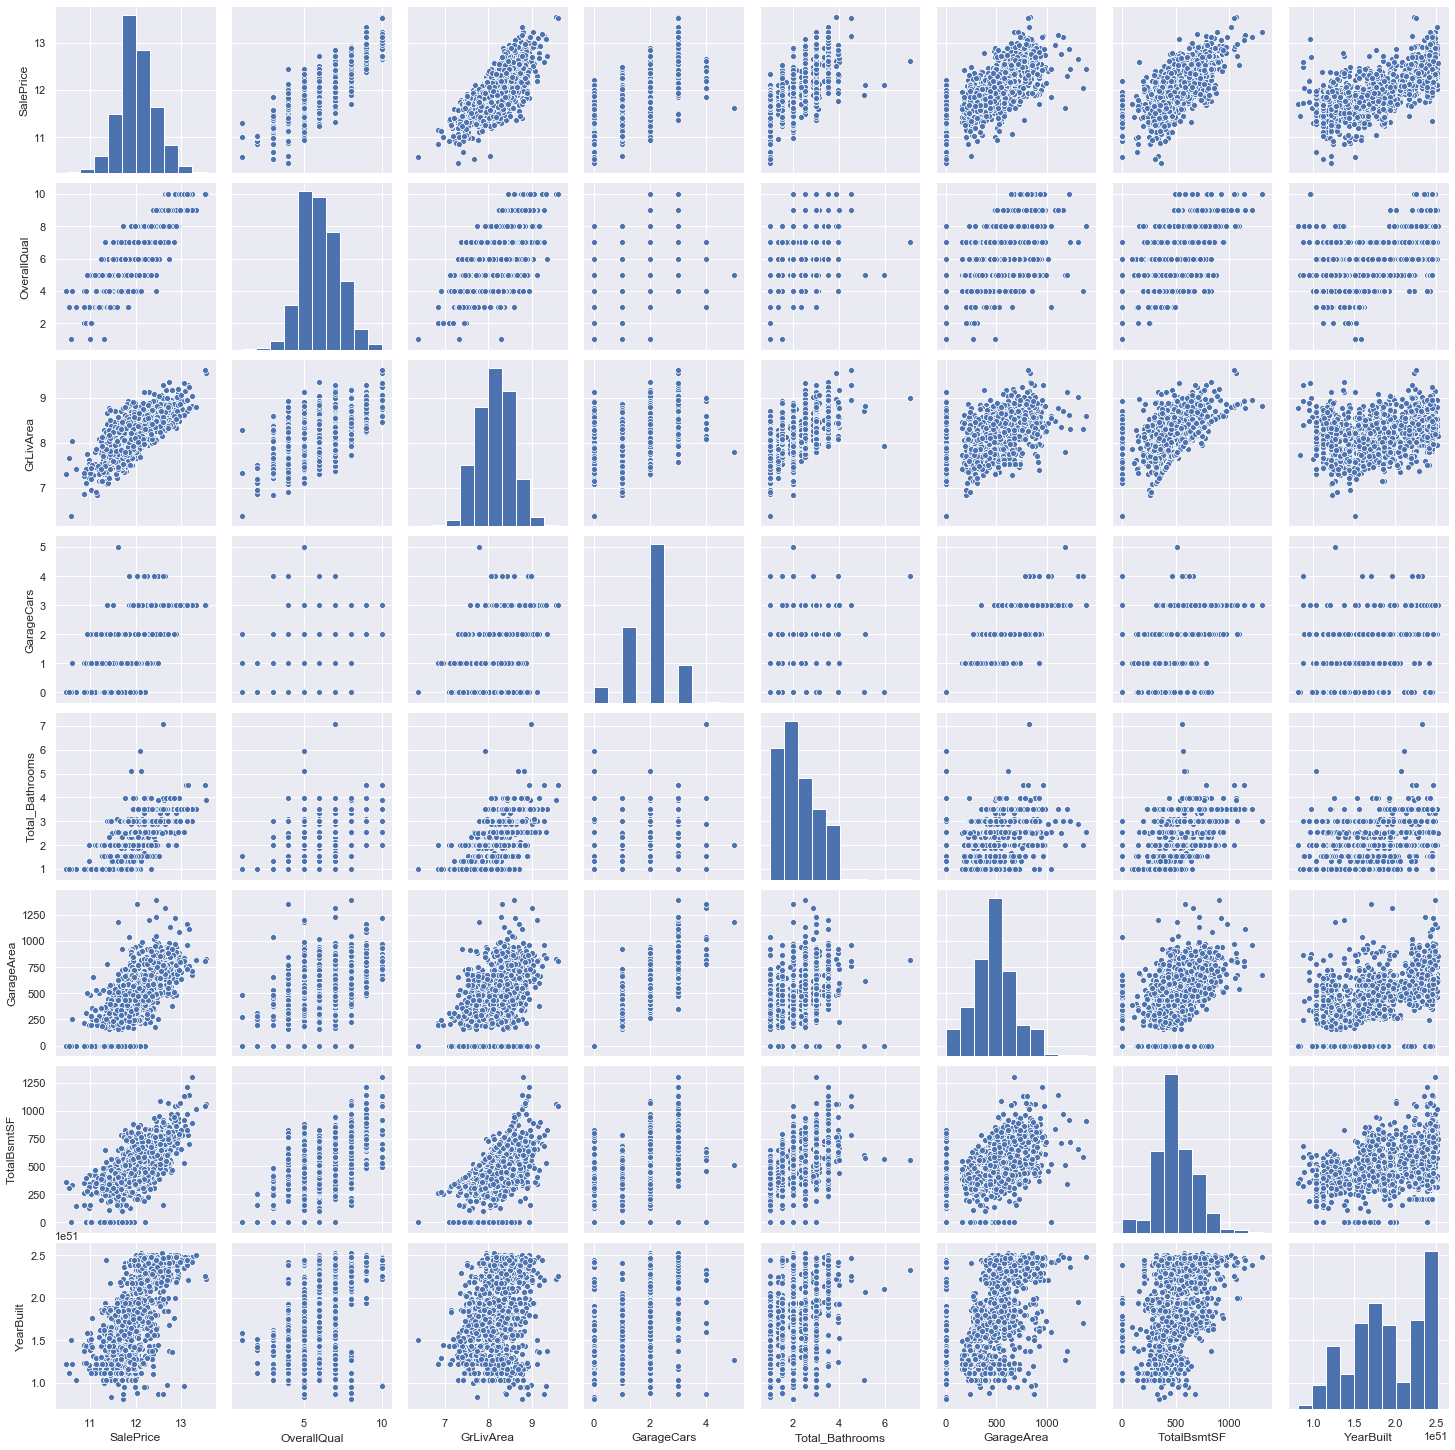

In [34]:
# pair plots for variables with largest correlation
var_num = 8
vars = cols_corr[0:var_num]

sns.set()
sns.pairplot(train[vars], size = 2.5)
plt.show();


## 8. Preparing the data 
Dropping Sale price, Creating dummy variable for the categorial variables and matching dimentions between train and test

In [35]:
data_features = data_features.drop("SalePrice", axis = 1)
final_features = pd.get_dummies(data_features)

print(final_features.shape)
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
X.shape, y_train.shape, X_test.shape


print(X.shape,y_train.shape,X_test.shape)


(2912, 334)
(1744, 334) (1744,) (1168, 334)


Removing overfit

In [36]:
# Removes colums where the threshold of zero's is (> 99.95), means has only zero values 
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print(X.shape,y_train.shape,X_test.shape)


(1744, 326) (1744,) (1168, 326)


## 9. Creating the model

### 9.1 Importing learning libraries

In [37]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



### 9.2 Defining folds and score functions

In [38]:
kfolds = KFold(n_splits=18, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### 9.3 Defining models

In [39]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

# xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)


svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm,
          'Svd': svr}
#           'xgboost': xgboost}
predictions = {}
scores = {}

### 9.4 Training the models

In [40]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

### 9.5 Validating and training each model

In [41]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)


print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))


---- Score with CV_RMSLE-----
Ridge score: 0.0814 (0.0224)

Lasso score: 0.0828 (0.0224)

ElasticNet score: 0.0825 (0.0224)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


### 9.6 Blend model prediction

In [42]:
def blend_models_predict(X):
    return ((0.16  * elastic_model.predict(X)) + \
            (0.16 * lasso_model.predict(X)) + \
            (0.11 * ridge_model.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
            (0.27 * stack_gen_model.predict(np.array(X))))

In [43]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.0642480869396188


## 10 Submission

In [44]:
print('Predict submission')
submission = pd.read_csv('Data2/sample_submission.csv')
submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))

Predict submission


In [45]:
# q1 = submission['SalePrice'].quantile(0.0042)
# q2 = submission['SalePrice'].quantile(0.99)
# # Quantiles helping us get some extreme values for extremely low or high values 
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)